<a href="https://colab.research.google.com/github/phamnguyenlongvu/Computer-Vision/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

import matplotlib.pyplot as plt

**Binary regression**

In [3]:
# Generate data
data, label = make_blobs(n_samples=500, n_features=2, centers=2)
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2)

In [4]:
print("Data: ", data.shape)
print("X train: ", X_train.shape)
print()

Data:  (500, 2)
X train:  (400, 2)



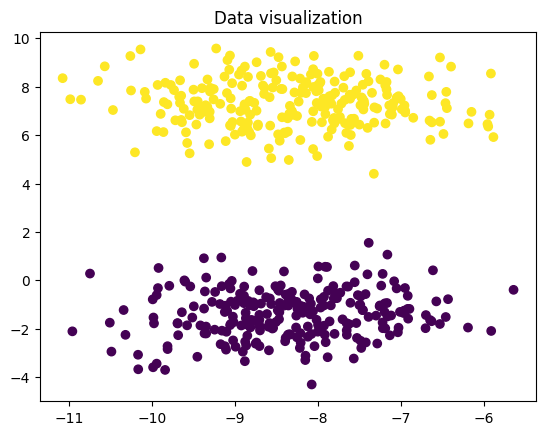

In [5]:
plt.scatter(data[:, 0], data[:, 1], c=label)
plt.title("Data visualization")
plt.show()

In [6]:
classification = Sequential()
classification.add(Dense(1, input_shape=(2,), activation='sigmoid'))

classification.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classification.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Call back
cbs = [EarlyStopping(patience=3, monitor='loss' ,restore_best_weights=True)]

classification.fit(X_train, y_train, 
                   batch_size=128, 
                   epochs=100, 
                   callbacks=cbs,
                   verbose=1)

In [10]:
weight = classification.get_weights()
weight

[array([[0.07312968],
        [0.21425566]], dtype=float32),
 array([0.05256543], dtype=float32)]

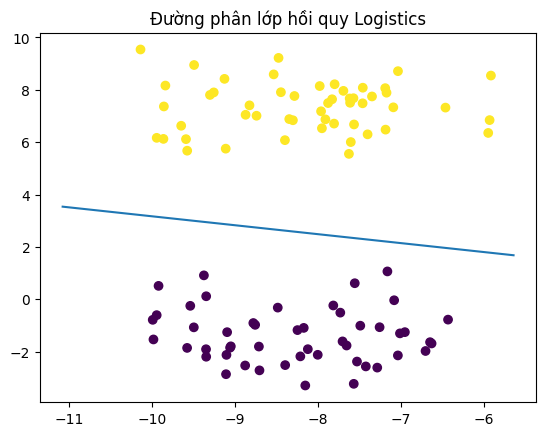

In [14]:
# Lấy tham số mô hình
coeff = weight[0]
intercept = weight[1]

# Ax+By+c = 0 -> y = (-A/B)*x - c/B
a = -(coeff[0] / coeff[1])
b = -(intercept / coeff[1])

# Chon diem
x_samples = np.linspace(data[:, 0].min(), data[:, 0].max(), 100)
y_samples = a * x_samples + b

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.plot(x_samples, y_samples, '-')
plt.title("Đường phân lớp hồi quy Logistics")
plt.show()

**Multi Regresstion**

In [84]:
# Generate data
def one_hot_encode(y):
  a = np.array(y)
  b = np.zeros((a.size, a.max()+1))
  b[np.arange(a.size), a] = 1
  return b
data, label = make_blobs(n_samples=500, n_features=2, centers=3)
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2)

y_train = one_hot_encode(y_train)

In [85]:
print("Data: ", data.shape)
print("X train: ", X_train.shape)
print("y train: ", y_train.shape)

Data:  (500, 2)
X train:  (400, 2)
y train:  (400, 3)


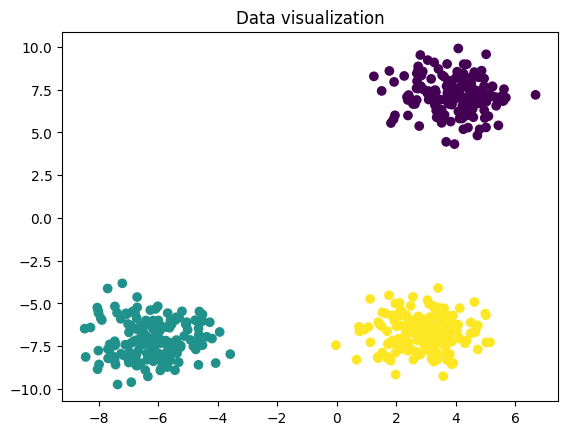

In [86]:
plt.scatter(data[:, 0], data[:, 1], c=label)
plt.title("Data visualization")
plt.show()

In [87]:
classification = Sequential()
classification.add(Dense(3, input_shape=(2,), activation='softmax'))

classification.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classification.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 3)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cbs = [EarlyStopping(patience=3, monitor='loss' ,restore_best_weights=True)]

classification.fit(X_train, y_train, 
                   batch_size=128, 
                   epochs=100, 
                   callbacks=cbs,
                   verbose=1)

In [91]:
weight = classification.get_weights()
weight

[array([[ 0.15927067, -0.62055033,  0.2822458 ],
        [ 1.3893384 , -0.02462651, -0.13778263]], dtype=float32),
 array([-0.41917378, -0.8118799 , -0.6697108 ], dtype=float32)]

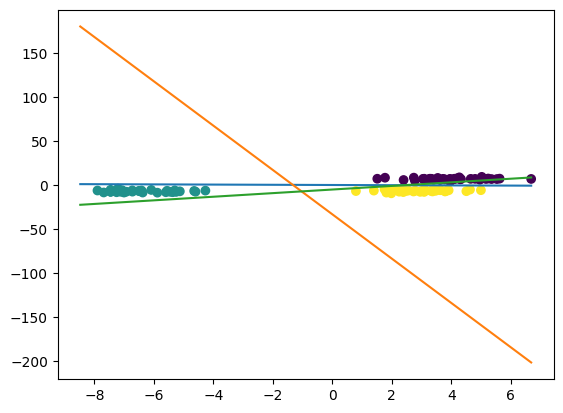

In [93]:
# Lấy tham số mô hình
coeff = weight[0]
intercept = weight[1]

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

# Ax+By+c = 0 -> y = (-A/B)*x - c/B
for i in range(3):
  a = -(coeff[0][i] / coeff[1][i])
  b = -(intercept[i] / coeff[1][i])

  # Chon cac diem 
  x_samples = np.linspace(data[:, 0].min(), data[:, 0].max(), 100)
  y_samples = a * x_samples + b

  plt.plot(x_samples, y_samples, '-')

plt.show()